In [1]:
import numpy as np
import pandas as pd

In [12]:
df=pd.read_csv("RTA Dataset.csv")
df.head()
df.shape

(12316, 32)

In [13]:

# df.info()
# df.head()
df.isnull().sum().sort_values(ascending=False)
# Drop if more than 40% missing
threshold = len(df) * 0.4
df = df.loc[:, df.isnull().sum() < threshold]

# Fill common categorical columns with 'Unknown'
fill_columns = [
    'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
    'Type_of_vehicle', 'Owner_of_vehicle', 'Defect_of_vehicle',
    'Lanes_or_Medians', 'Types_of_Junction'
]

for col in fill_columns:
    df[col] = df[col].fillna('Unknown')


In [17]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.title()
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


C:\Users\Brahmi\AppData\Local\Temp\ipykernel_9640\2842191235.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


In [ ]:
# Drop exact duplicates
df.drop_duplicates(inplace=True)
# View unique values
print(df['Driving_experience'].unique())

# Clean some values
df['Driving_experience'] = df['Driving_experience'].replace({
    'No Experience': 'None',
    'Below 1yr': '<1yr',
    'Above 10yr': '>10yr'
})



['1-2Yr' 'Above 10Yr' '5-10Yr' '2-5Yr' 'Unknown' 'No Licence' 'Below 1Yr']
['1-2Yr' 'Above 10Yr' '5-10Yr' '2-5Yr' 'Unknown' 'No Licence' 'Below 1Yr']


In [22]:
# Fill remaining missing values
fill_cols = ['Service_year_of_vehicle', 'Area_accident_occured', 'Road_allignment', 'Road_surface_type', 'Type_of_collision']

for col in fill_cols:
    df[col] = df[col].fillna('Unknown')


In [23]:
df.info()  # Should show no major missing values
df.head()  # View cleaned sample



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Defect_of_vehicle            12316 non-null  object
 11  Area_accident_occured        12316 non-null  object
 12  Lanes_or_Medians             12316 non-null  object
 13  Road_allignment              12

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour
0,17:02:00,Monday,18-30,Male,Above High School,Employee,1-2Yr,Automobile,Owner,Above 10Yr,...,Na,Na,Na,Na,NaN,NaN,Not A Pedestrian,Moving Backward,Slight Injury,17
1,17:02:00,Monday,31-50,Male,Junior High School,Employee,Above 10Yr,Public (> 45 Seats),Owner,5-10Yrs,...,Na,Na,Na,Na,NaN,NaN,Not A Pedestrian,Overtaking,Slight Injury,17
2,17:02:00,Monday,18-30,Male,Junior High School,Employee,1-2Yr,Lorry (41?100Q),Owner,Unknown,...,Driver Or Rider,Male,31-50,3,Driver,NaN,Not A Pedestrian,Changing Lane To The Left,Serious Injury,17
3,1:06:00,Sunday,18-30,Male,Junior High School,Employee,5-10Yr,Public (> 45 Seats),Governmental,Unknown,...,Pedestrian,Female,18-30,3,Driver,Normal,Not A Pedestrian,Changing Lane To The Right,Slight Injury,1
4,1:06:00,Sunday,18-30,Male,Junior High School,Employee,2-5Yr,Unknown,Owner,5-10Yrs,...,Na,Na,Na,Na,NaN,NaN,Not A Pedestrian,Overtaking,Slight Injury,1


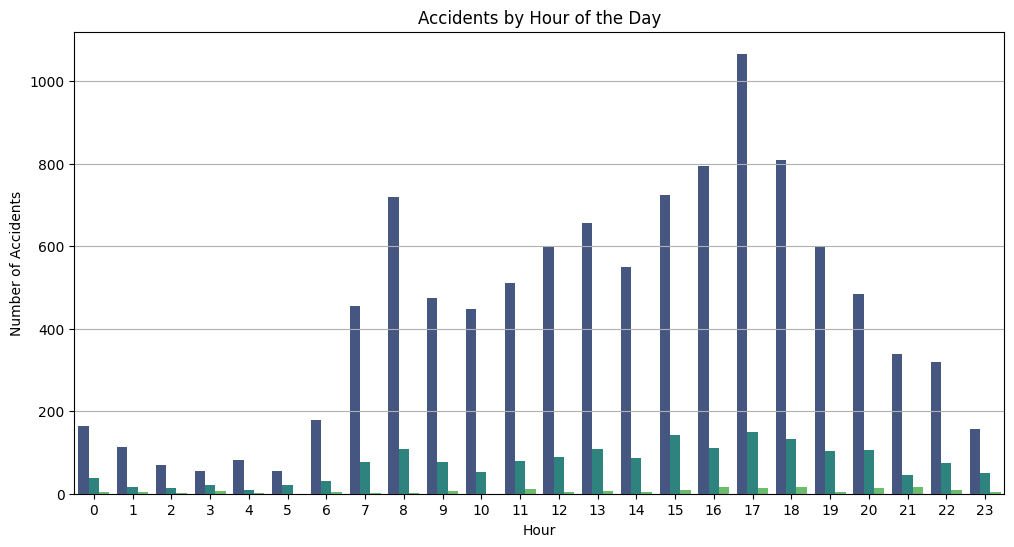

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df,hue='Accident_severity',legend=False,palette='viridis')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.xticks(range(24))
plt.grid(True, axis='y')
plt.show()


C:\Users\Brahmi\AppData\Local\Temp\ipykernel_9640\3399482300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Weather_conditions', data=df, order=df['Weather_conditions'].value_counts().index, palette='coolwarm')


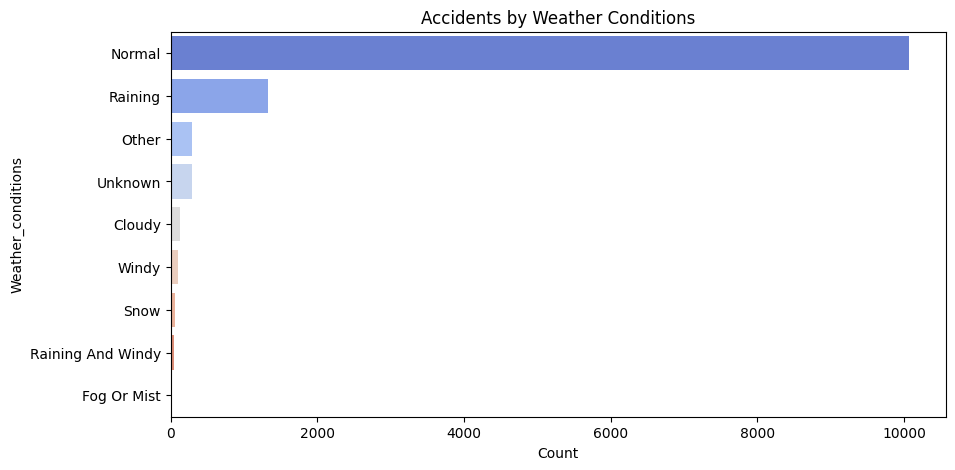

C:\Users\Brahmi\AppData\Local\Temp\ipykernel_9640\3399482300.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Light_conditions', data=df, order=df['Light_conditions'].value_counts().index, palette='magma')


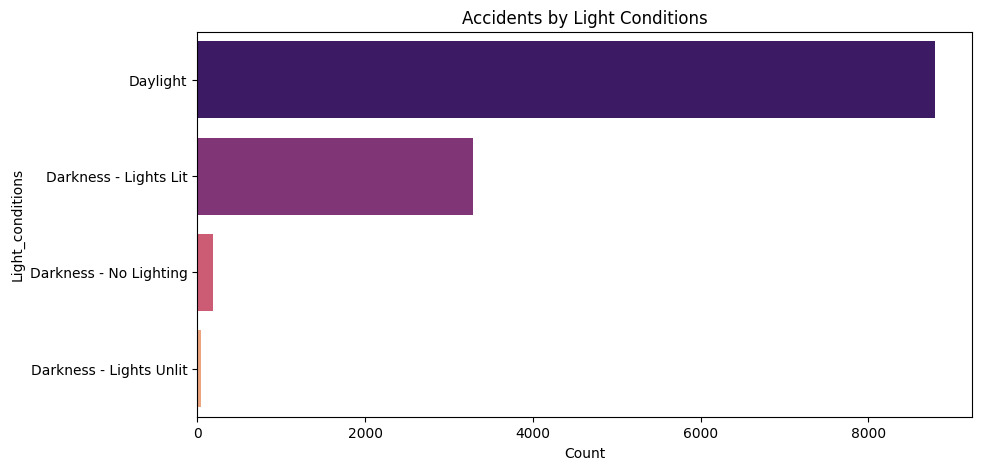

In [31]:
# Weather
plt.figure(figsize=(10, 5))
sns.countplot(y='Weather_conditions', data=df, order=df['Weather_conditions'].value_counts().index, palette='coolwarm')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Count')
plt.show()

# Light Conditions
plt.figure(figsize=(10, 5))
sns.countplot(y='Light_conditions', data=df, order=df['Light_conditions'].value_counts().index, palette='magma')
plt.title('Accidents by Light Conditions')
plt.xlabel('Count')
plt.show()


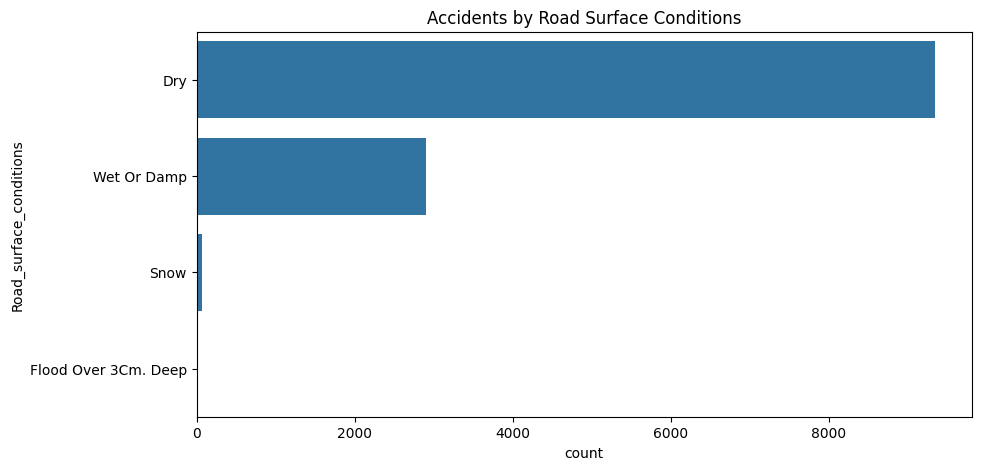

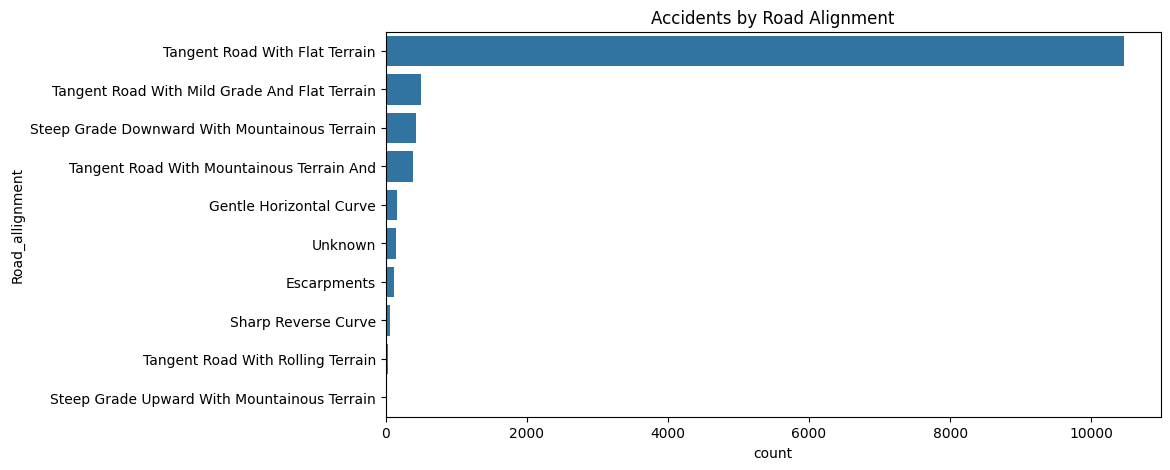

In [32]:
# Surface Conditions
plt.figure(figsize=(10, 5))
sns.countplot(y='Road_surface_conditions', data=df, order=df['Road_surface_conditions'].value_counts().index)
plt.title('Accidents by Road Surface Conditions')
plt.show()

# Road Alignment
plt.figure(figsize=(10, 5))
sns.countplot(y='Road_allignment', data=df, order=df['Road_allignment'].value_counts().index)
plt.title('Accidents by Road Alignment')
plt.show()


C:\Users\Brahmi\AppData\Local\Temp\ipykernel_9640\3168074911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Cause_of_accident', data=df, order=df['Cause_of_accident'].value_counts().head(10).index, palette='Set2')


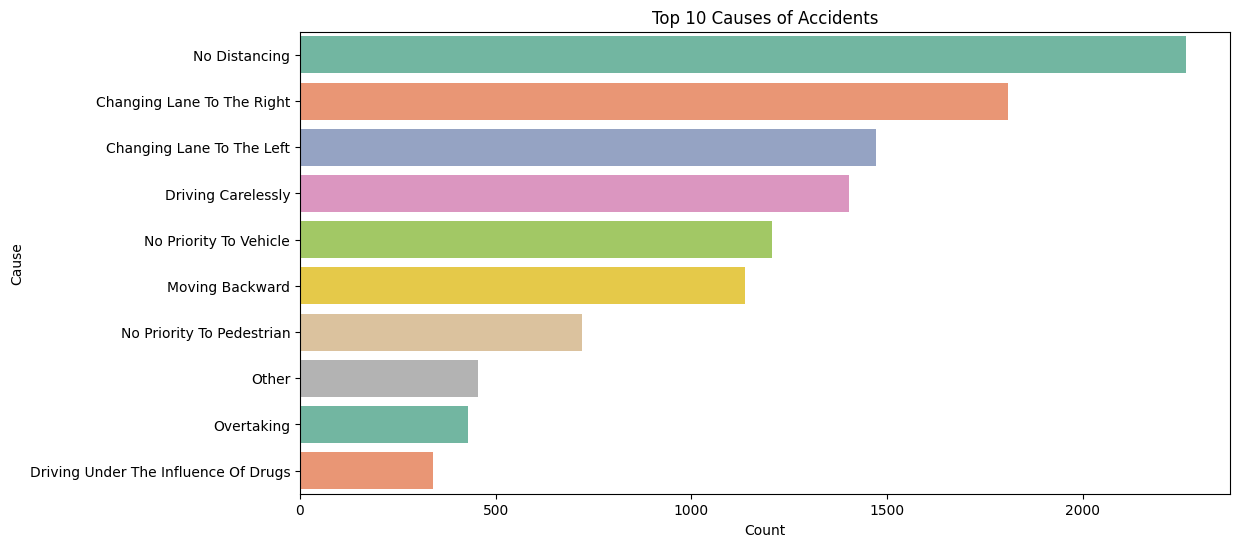

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Cause_of_accident', data=df, order=df['Cause_of_accident'].value_counts().head(10).index, palette='Set2')
plt.title('Top 10 Causes of Accidents')
plt.xlabel('Count')
plt.ylabel('Cause')
plt.show()


C:\Users\Brahmi\AppData\Local\Temp\ipykernel_9640\952928536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Area_accident_occured', data=df, order=df['Area_accident_occured'].value_counts().head(10).index, palette='Reds')


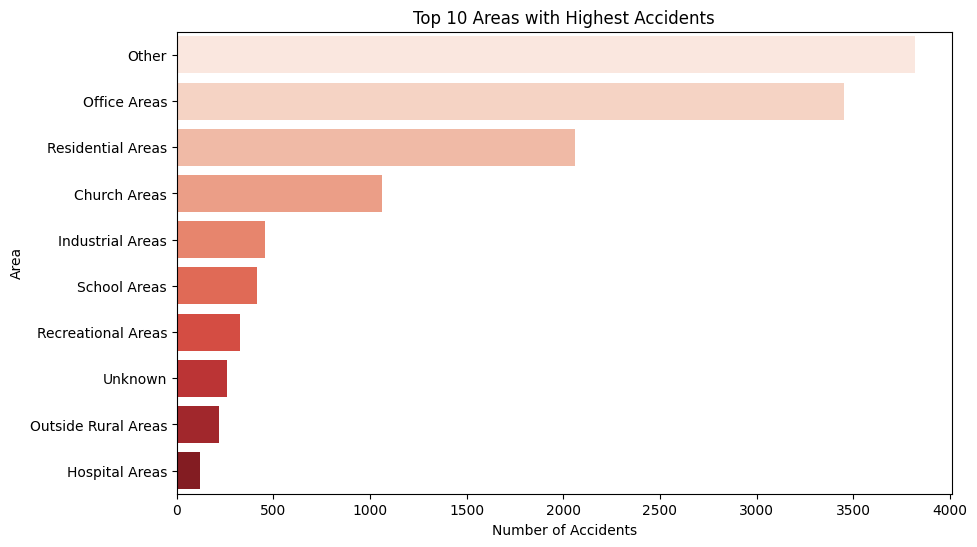

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Area_accident_occured', data=df, order=df['Area_accident_occured'].value_counts().head(10).index, palette='Reds')
plt.title('Top 10 Areas with Highest Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Area')
plt.show()



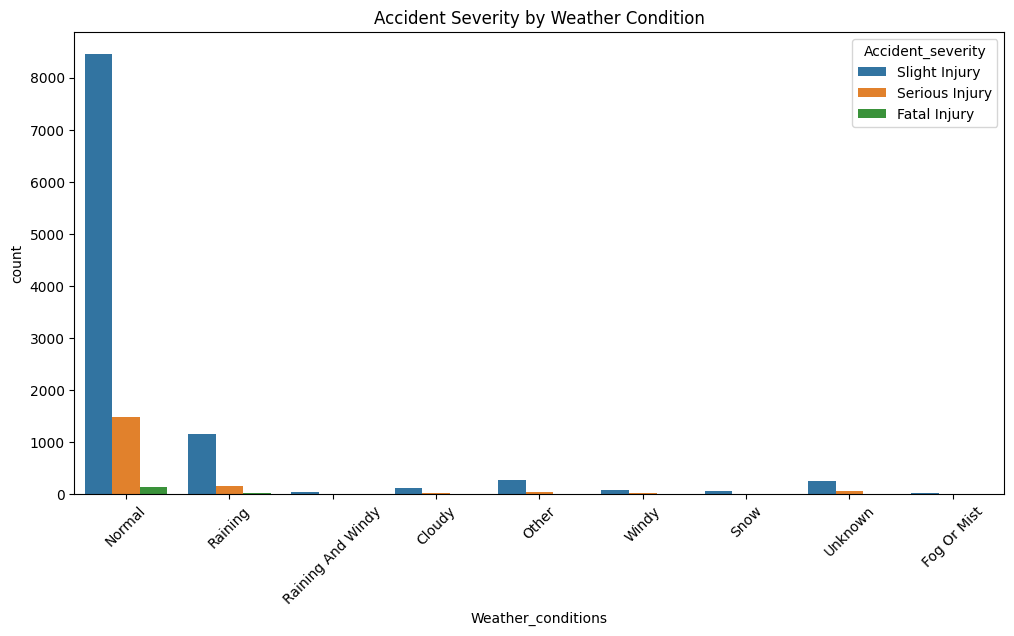

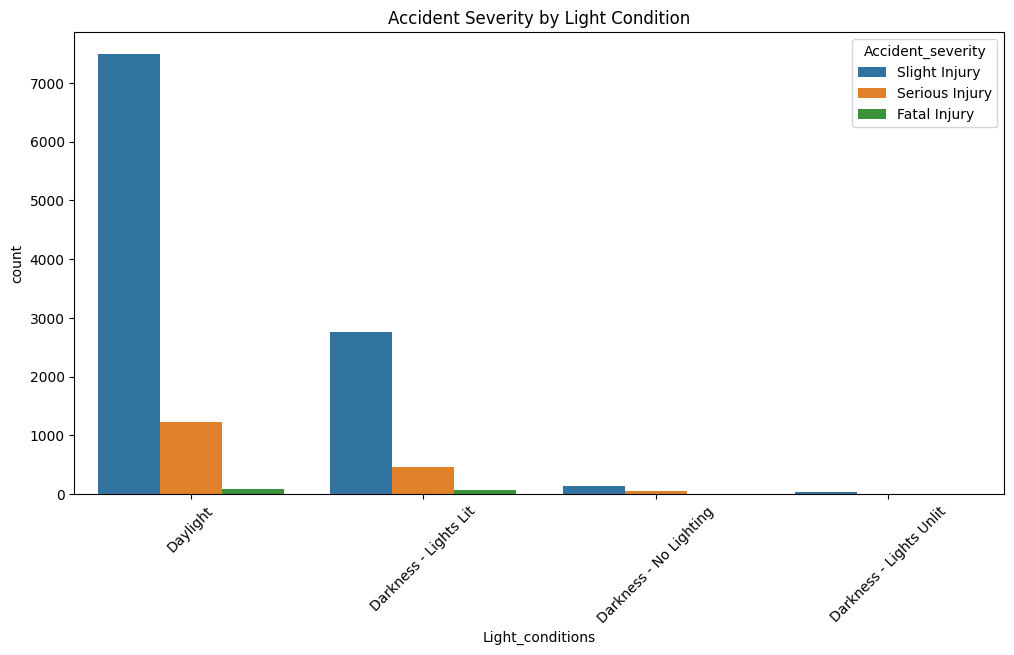

In [35]:
# Weather vs Severity
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather_conditions', hue='Accident_severity', data=df)
plt.xticks(rotation=45)
plt.title('Accident Severity by Weather Condition')
plt.show()

# Light vs Severity
plt.figure(figsize=(12, 6))
sns.countplot(x='Light_conditions', hue='Accident_severity', data=df)
plt.xticks(rotation=45)
plt.title('Accident Severity by Light Condition')
plt.show()
